In [39]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time
from multiprocessing import Pool

In [41]:
 clus = np.genfromtxt("/Users/innocent/data/clusterShape.csv", delimiter=" ", skip_header=0, names=True)

In [59]:
print clus.dtype.names
print clus[0]
print clus['sx']

('isBarrel', 'layer', 'simX', 'simY', 'simSX', 'simSY', 'recX', 'recY', 'x', 'y', 'xx', 'yy', 'xy', 'dx', 'dy', 'sx', 'sy')
(1.0, 1.0, -0.476628, 0.693904, -0.623888, 3.48074, -0.475863, 0.693917, 0.26673, 1.73982, 0.195585, 1.06585, -0.301645, -1.28592, 4.11209, 2.0, 4.0)
[ 2.  1.  1. ...,  2.  2.  2.]


In [67]:
def hist(w) :
    nbins = 100
    y1,xy = np.histogram(clus['sy']-clus['simSY'],np.linspace(-4.,4.,nbins),weights=w, density=True)
    y2,xy = np.histogram(clus['dy']-clus['simSY'],np.linspace(-4.,4.,nbins),weights=w, density=True)
    xy.resize(len(y2))
    x1,xx = np.histogram(abs(clus['sx'])-abs(clus['simSX']),np.linspace(-4.,4.,nbins),weights=w, density=True)
    x2,xx = np.histogram(abs(clus['dx'])-abs(clus['simSX']),np.linspace(-4.,4.,nbins),weights=w, density=True)
    x3,xx = np.histogram(clus['dx']-clus['simSX'],np.linspace(-4.,4.,nbins),weights=w, density=True)
    xx.resize(len(x2))
    l = np.sqrt(clus['dy']*clus['dy']+clus['dx']*clus['dx'])
    sl = np.sqrt(clus['simSY']*clus['simSY']+clus['simSX']*clus['simSX'])
    ly,lx =  np.histogram(l-sl,np.linspace(-4.,4.,nbins),weights=w, density=True)
    lx.resize(len(ly))
    
    return xy,y1,y2,xx,x1,x2,x3,lx,ly

In [84]:
nbins = 100
isl1 = np.equal(clus['layer'],1)
notl1 = np.logical_not(isl1)
xy,y1,y2,xx,x1,x2,x3,lx,ly = hist((clus['isBarrel'])*isl1)

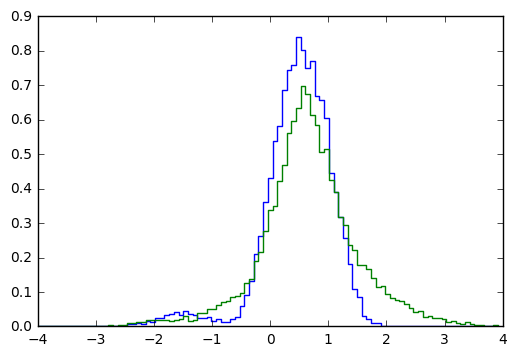

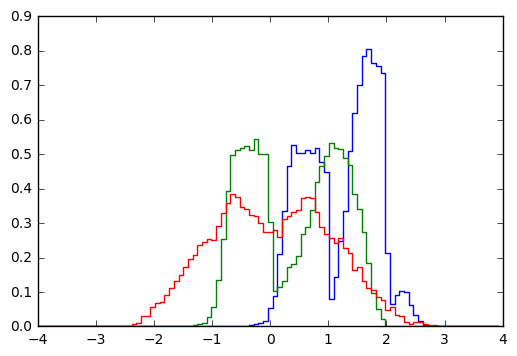

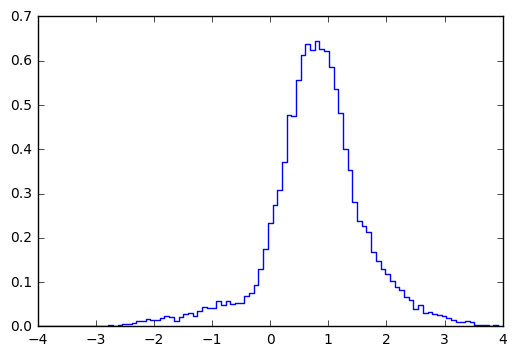

In [85]:
plt.step(xy,y1,where='post')
plt.step(xy,y2,where='post')
plt.show()
plt.step(xx,x1,where='post')
plt.step(xx,x2,where='post')
plt.step(xx,x3,where='post')
plt.show()
plt.step(lx,ly,where='post')
plt.show()

